<a href="https://colab.research.google.com/github/tritus-soi/sample_project/blob/master/covid19_Mar_2021_poly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ทำนายผู้ติดเชื้อ Covid ด้วย Polynomail Regression

In [56]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### import data มาจากองค์การอนามัยโลก ข้อมูลล่าสุดเมื่อ 10 มีนาคม 2564

In [58]:
df = pd.read_csv('/content/drive/MyDrive/ DataScienceBootcamp/data_analyst/covid_TH.csv')
df.head()

,Date_reported,New_cases,New_deaths
0,01/03/20,0,0
1,01/04/20,0,0
2,01/05/20,0,0
3,01/06/20,0,0
4,01/07/20,0,0


#### นำช่วงไม่เกี่ยวข้องออก นับเวลา 1 ปีที่แล้วตั้งแต่ 1 มีนาคม 2563

In [59]:
df =df[(df.index >=58)]
df.head()

,Date_reported,New_cases,New_deaths
58,03/01/20,0,1
59,03/02/20,1,0
60,03/03/20,0,0
61,03/04/20,0,0
62,03/05/20,4,0


### กราฟแสดงแนวโน้ม ในระยะเวลา 1 ปี

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

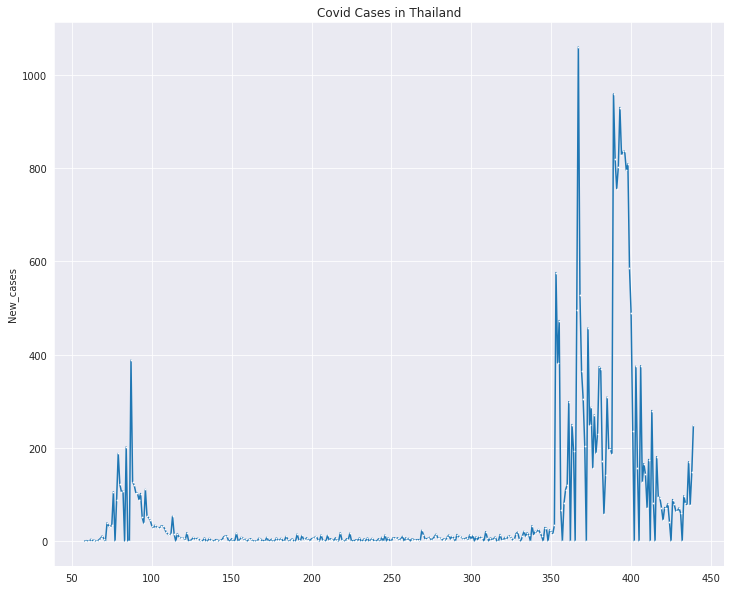

In [60]:
plt.figure(figsize =(12, 10))
sns.lineplot(df.index,'New_cases', data=df, marker='o', markersize=1)
plt.title('Covid Cases in Thailand')
plt.show

In [61]:
x = df.index.values.reshape(-1, 1)
y = df.New_cases
x[:5], y[:5]
# แยกข้อมูลวันและเคส

(array([[58],
        [59],
        [60],
        [61],
        [62]]), 58    0
 59    1
 60    0
 61    0
 62    4
 Name: New_cases, dtype: int64)

#### Train Model

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(x) # Fit Regression Model
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Plot กราฟเทียบข้อมูลคาดคะเน กับข้อมูลจริง

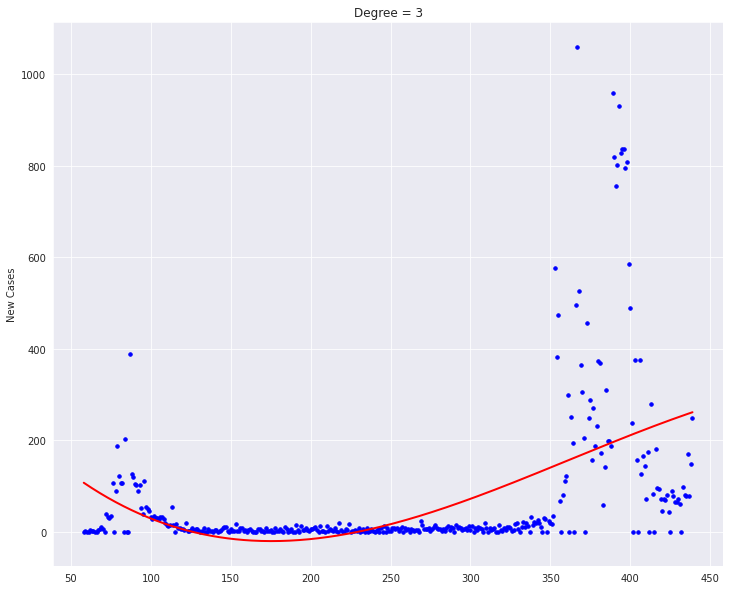

In [63]:
y_poly_pred = model.predict(x_poly)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']= 12, 10
plt.scatter(x, y, color='b', s=12)
plt.plot(x, y_poly_pred, linewidth='2', color='r')
plt.ylabel('New Cases')
plt.title('Degree = 3')
plt.show()

### ประเมนโมเดลด้วย R2

In [64]:
from sklearn.metrics import r2_score
print ('R2 = {:.5f}' .format(r2_score(y, y_poly_pred)))

R2 = 0.25378


#### ลองทดสอบทำนายผล

In [114]:
x_input = [[30],[60],[90],[120],[130]] #จำนวนวัน นับจาก 1 มีนาคม 2564

In [115]:
y_poly_pred = model.predict(poly_features.fit_transform(x_input))


for val in y_poly_pred:
    print ("ผู้ติดเชื้อใหม่ "'{:.0f}' .format(val), "ราย")

ผู้ติดเชื้อใหม่ 183 ราย
ผู้ติดเชื้อใหม่ 102 ราย
ผู้ติดเชื้อใหม่ 44 ราย
ผู้ติดเชื้อใหม่ 5 ราย
ผู้ติดเชื้อใหม่ -4 ราย
